# Structural distance between graphs

In this toy example we show that GOT takes into account the structural difference between graphs. We generate a graph with two strong communities and create two copies of it. From the first copy we remove edges between communities, rendering the graph almost disconnected, while from the second copy we remove edges within communities, resulting in a much less noticable difference. We then compute the Wasserstein distance with both examples and compare it to the Euclidian distance between graph Laplacian matrices (which is the same since the same number of non-weighted vertices have been removed).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import numpy.linalg as lg
import copy
import scipy.linalg as slg
from ipywidgets import interact
from stochastic import *

## Synthetic data construction

In [2]:
n = 14;
g1 = nx.stochastic_block_model([7,7],[[0.9,0.1],[0.1,0.9]], seed = 8576)

l1 = nx.laplacian_matrix(g1,range(n))
l1 = l1.todense()

In [3]:
g2 = copy.deepcopy(g1)
g2.remove_edge(4,13)
g2.remove_edge(3,7)

l2 = nx.laplacian_matrix(g2,range(n))
l2 = l2.todense()

g3 = copy.deepcopy(g1)
g3.remove_edge(4,6)
g3.remove_edge(8,9)

l3 = nx.laplacian_matrix(g3,range(n))
l3 = l3.todense()

## Wasserstein distance between graphs

In [4]:
def wass_dist_(A, B):
    n = len(A)
    l1_tilde = A + np.ones([n,n])/n #adding 1 to zero eigenvalue; does not change results, but is faster and more stable
    l2_tilde = B + np.ones([n,n])/n #adding 1 to zero eigenvalue; does not change results, but is faster and more stable
    s1_tilde = lg.inv(l1_tilde)
    s2_tilde = lg.inv(l2_tilde)
    Root_1= slg.sqrtm(s1_tilde)
    Root_2= slg.sqrtm(s2_tilde)
    return np.trace(s1_tilde) + np.trace(s2_tilde) - 2*np.trace(slg.sqrtm(Root_1 @ s2_tilde @ Root_1)) 


In [5]:
def plot_graphs_ch_(x_ch, y_ch, y_ch_, P_true, name):
    N_nodes = x_ch.shape[0]
    A1 = -x_ch.copy()
    np.fill_diagonal(A1, 0)
    G1 = nx.from_numpy_array(A1)
    n1 = np.arange(N_nodes)

    A2 = -y_ch.copy()
    np.fill_diagonal(A2, 0)
    G2 = nx.from_numpy_array(P_true.T @ A2 @ P_true)
    n2 = (P_true@n1).astype(int)
    
    A3 = -y_ch_.copy()
    np.fill_diagonal(A3, 0)
    G3 = nx.from_numpy_array(P_true.T @ A3 @ P_true)
    n3 = (P_true@n1).astype(int)
    
    pos = nx.kamada_kawai_layout(G1) 
    pos[1] = pos[1] - [0.1, 0.1]
    
    fig1 = plt.figure(figsize=(5, 5))
    plt.axis('off')
    show_network(G1, pos=pos, ax=fig1.gca())
    #fig1.savefig('graph_sbm1.png', dpi=fig1.dpi, pad_inches=0, bbox_inches='tight')
    
    fig2 = plt.figure(figsize=(5, 5))
    plt.axis('off')
    show_network(G2, pos=pos, labels=n2, y=np.ones(N_nodes), ax=fig2.gca())
    #fig2.savefig('graph_sbm2.png', dpi=fig2.dpi, pad_inches=0, bbox_inches='tight')
    
    fig3 = plt.figure(figsize=(5, 5))
    plt.axis('off')
    show_network(G3, pos=pos, labels=n3, y=np.ones(N_nodes), ax=fig3.gca())
    #fig3.savefig('graph_sbm3.png', dpi=fig3.dpi, pad_inches=0, bbox_inches='tight')
    

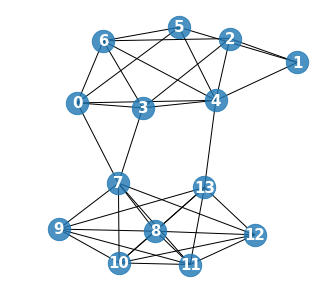

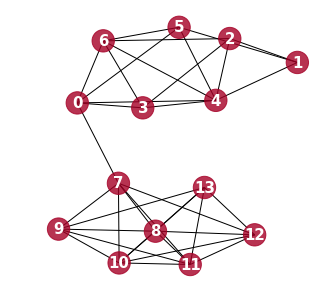

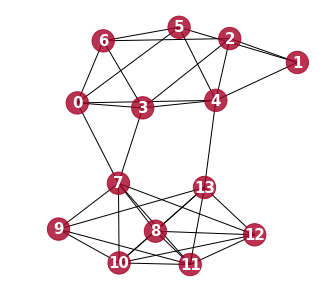

In [6]:
plot_graphs_ch_(l1, l2, l3, np.eye(n), 'graph.png')

In [7]:
print('Wasserstein distance', wass_dist_(l1, l2))
print('L2 distance', lg.norm(l1-l2))

Wasserstein distance 0.9123385656415497
L2 distance 2.8284271247461903


In [8]:
print('Wasserstein distance', wass_dist_(l1, l3))
print('L2 distance', lg.norm(l1-l3))

Wasserstein distance 0.013440651298566308
L2 distance 2.8284271247461903
